In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/content/train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()              #8 object , 1 int ,4 float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Preprocessing

In [7]:
df.isnull().sum()         #To check wether our data has missing values or not

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Numerical Values are filled with mean
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)

#Categorical Values are filled with mode
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [9]:
# We remove the remaining null values as they are less than 3%
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

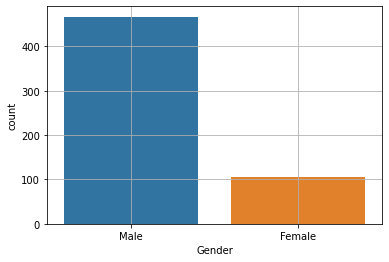

In [11]:
sns.countplot(df["Gender"])      #this graph shows the applicants according to gender
plt.grid()
plt.show()

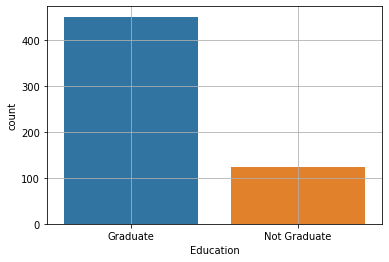

In [12]:
sns.countplot(df["Education"])      #this graph show that maximum applicant are educated
plt.grid()
plt.show()

In [13]:
df[(df["Loan_Status"]=="Y")&(df["Education"]=="Not Graduate")].count()[1] #shows approved loan for non Graduates

78

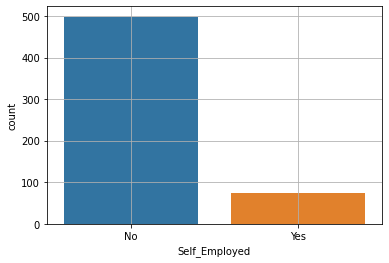

In [14]:
sns.countplot(df["Self_Employed"]) #shows self-Employed candidates 
plt.grid()
plt.show()

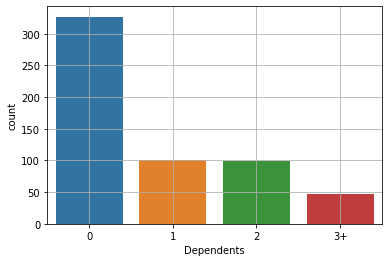

In [15]:
sns.countplot(df["Dependents"])
plt.grid()
plt.show()

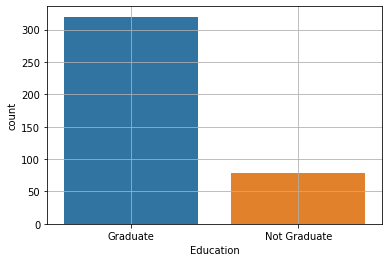

In [16]:
sns.countplot(df[df["Loan_Status"]=="Y"].Education) #this plot shows that loan are approved mostly to educated candidate.
plt.grid()

In [17]:
df["LoanAmount"].max()  #maximum amount of loan

650.0

In [18]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [19]:
le = LabelEncoder()
for i in df.select_dtypes(object):
  df[i] = le.fit_transform(df[i])

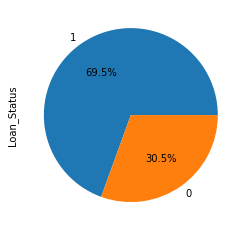

In [20]:
df["Loan_Status"].value_counts().plot.pie(autopct="%1.1f%%")   #percentage of approved and disapproved loan
plt.show()

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
df.drop("Loan_ID",inplace=True,axis=1) #dropping id

In [23]:
x = df.drop("Loan_Status",axis=1)    #splitting the data into x and y
y = df["Loan_Status"]

In [24]:
from sklearn.model_selection import train_test_split              #imported the required modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


In [25]:
df["Loan_Status"].value_counts()

1    398
0    175
Name: Loan_Status, dtype: int64

In [26]:
ss = StandardScaler()


In [27]:
from imblearn.under_sampling import NearMiss
n = NearMiss()
x1, y1 = n.fit_resample(x,y)

In [28]:
x1.shape,y1.shape

((350, 11), (350,))

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1, test_size=0.25, random_state=2)
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [30]:
lr= LogisticRegression()
lr.fit(xtrain,ytrain)
yp = lr.predict(xtest)

In [31]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76        45
           1       0.72      0.95      0.82        43

    accuracy                           0.80        88
   macro avg       0.83      0.80      0.79        88
weighted avg       0.83      0.80      0.79        88



In [32]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [47]:
a = [[1,1,3,0,0,500,0,100,10,0.1,0]]
a = ss.transform(a)

In [48]:
lr.predict(a)

array([0])

In [35]:
from collections import Counter
(Counter(y))


Counter({0: 175, 1: 398})

In [36]:
Counter(y1)

Counter({0: 175, 1: 175})

Conclusion:
1. Male Candidates are more.
2. Loan approved mostly to the Educated Candidates.
3. Loans are approved to those whose Credit History are good.